In [ ]:
!wget http://motioncore-umh.cs.umn.edu/4980/sms_spam_cleaned.csv

--2023-10-14 21:19:43--  http://motioncore-umh.cs.umn.edu/4980/sms_spam_cleaned.csv
Resolving motioncore-umh.cs.umn.edu (motioncore-umh.cs.umn.edu)... 128.101.106.27
Connecting to motioncore-umh.cs.umn.edu (motioncore-umh.cs.umn.edu)|128.101.106.27|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 445082 (435K) [text/csv]
Saving to: ‘sms_spam_cleaned.csv.5’

sms_spam_cleaned.cs 100%[===================>] 434.65K  --.-KB/s    in 0.1s    

2023-10-14 21:19:43 (3.64 MB/s) - ‘sms_spam_cleaned.csv.5’ saved [445082/445082]



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

In [ ]:
df = pd.read_csv("sms_spam_cleaned.csv")
df

type                                                msg
0      ham  Go until jurong point crazy.. Available only i...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf he lives arou...
...    ...                                                ...
5307  spam  REMINDER FROM O2: To get 2.50 pounds free call...
5308  spam  This is the 2nd time we have tried 2 contact u...
5309   ham               Will ü b going to esplanade fr home?
5310   ham  Pity * was in mood for that. So...any other su...
5311   ham                         Rofl. Its true to its name

[5312 rows x 2 columns]

In [ ]:
#A TF-IDF Vectorizer with Stemming
import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedTfidfVectorizer(TfidfVectorizer):
   def build_analyzer(self):
     analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
     return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

vectorizer = StemmedTfidfVectorizer(min_df=1, stop_words='english')
csv_cat = vectorizer.fit_transform(df['msg'])
print(csv_cat)

  (0, 6557)	0.19494453255182584
  (0, 968)	0.35444870762898073
  (0, 2911)	0.16674686987924656
  (0, 1727)	0.2991438955438283
  (0, 1504)	0.33827308703935854
  (0, 3619)	0.2991438955438283
  (0, 6715)	0.23804719394531998
  (0, 2945)	0.19531222168980927
  (0, 1506)	0.2991438955438283
  (0, 1143)	0.26463569723038377
  (0, 1927)	0.27406618855786774
  (0, 4762)	0.24510566568210612
  (0, 3515)	0.35444870762898073
  (1, 4458)	0.5652262007399903
  (1, 6639)	0.4456051952900526
  (1, 3482)	0.47436597209442843
  (1, 3647)	0.42136395982184277
  (1, 4433)	0.2817528878462737
  (2, 70)	0.23929429568304858
  (2, 1031)	0.1699627610575847
  (2, 5016)	0.16619437193175626
  (2, 6288)	0.12927191442097655
  (2, 5737)	0.20017168568877466
  (2, 4973)	0.1683945244152505
  (2, 5054)	0.16619437193175626
  :	:
  (5308, 152)	0.3482777925744393
  (5308, 288)	0.2621478220607156
  (5308, 1494)	0.23608112409475365
  (5308, 656)	0.25801774896735846
  (5308, 2317)	0.23959387043175806
  (5308, 4049)	0.22711066286429257


In [ ]:
print(csv_cat.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
labels = df['type']

In [ ]:
def cos_similarity(v1, v2):
  v1_n = np.linalg.norm(v1)
  v2_n = np.linalg.norm(v2)
  if(v1_n == 0 or v2_n == 0):
    return 0.0
  v1_norm = v1/v1_n
  v2_norm = v2/v2_n
  return np.vdot(v1_norm,v2_norm)

In [ ]:
def labelPrompt(promt):
  new_post_vec = vectorizer.transform([promt])
  dists = [cos_similarity(new_post_vec.toarray(),train_vec.toarray()) for train_vec in csv_cat]
  closest_id = np.argmax(dists)
  # print(posts[closest_id])
  return labels[closest_id]

In [ ]:
print(labelPrompt("enter"))

spam


In [ ]:
num_clusters = 2
km = KMeans(n_clusters=num_clusters, init='random', n_init=10, verbose=1)
km.fit(csv_cat)

Initialization complete
Iteration 0, inertia 10537.220846323631.
Iteration 1, inertia 5236.6045868144165.
Iteration 2, inertia 5235.731164814536.
Iteration 3, inertia 5235.494946200382.
Iteration 4, inertia 5235.198532762243.
Iteration 5, inertia 5234.542658907058.
Iteration 6, inertia 5233.618759546869.
Iteration 7, inertia 5233.448762897706.
Iteration 8, inertia 5233.441476911854.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 10307.683626153277.
Iteration 1, inertia 5213.616692289641.
Iteration 2, inertia 5212.891169828839.
Iteration 3, inertia 5212.628918740983.
Iteration 4, inertia 5212.531250675442.
Iteration 5, inertia 5212.512088190434.
Iteration 6, inertia 5212.494743804102.
Iteration 7, inertia 5212.489417056233.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 10368.818074295585.
Iteration 1, inertia 5231.572149013531.
Iteration 2, inertia 5229.022622281074.
Iteration 3, inertia 5227.326582

KMeans(init='random', n_clusters=2, n_init=10, verbose=1)

In [ ]:
km.labels_

array([1, 0, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
km.cluster_centers_

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.61336095e-04, 1.11143839e-04, 5.82850737e-05, ...,
        4.74211577e-05, 4.53255178e-05, 8.41091017e-05]])

In [ ]:
num_in_clusters = [sum(km.labels_ == 0), sum(km.labels_==1)]
num_in_clusters

[193, 5119]

In [ ]:
new_post = "ENTRY"
new_post_vec = vectorizer.transform([new_post])

In [ ]:
new_post_cluster = km.predict(new_post_vec)[0]
print(new_post_cluster)

1


In [ ]:
cluster_neighbor_indices = (km.labels_==new_post_cluster).nonzero()[0]
print(cluster_neighbor_indices[0:10]) #first 10 cluster indicies

[ 0  2  3  4  5  6  7  8  9 10]


In [ ]:
labels = df['type']
labels = labels.to_numpy()
category = df['msg']
category = category.to_numpy()

In [ ]:
np.random.choice(labels[cluster_neighbor_indices],10)

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham',
       'ham'], dtype=object)

In [ ]:
cluster_neighbors = []
for i in cluster_neighbor_indices:
  dist = np.linalg.norm((new_post_vec.toarray() - csv_cat[i].toarray()))
  cluster_neighbors.append((dist, category[i], labels[i]))
  cluster_neighbors = sorted(cluster_neighbors)
print(len(cluster_neighbors))

5119


In [ ]:
scount = 0
hcount = 0
for dist, category, label in cluster_neighbors:
  if(label == 'spam'):
    scount += 1
  elif (label == 'ham'):
    hcount += 1
print(scount)
print(hcount)

686
4433


In [ ]:
s_per = scount / len(cluster_neighbors)
h_per = hcount / len(cluster_neighbors)
print ( s_per, h_per)

0.13401054893533892 0.8659894510646611


In [ ]:
df_spam = 0
df_ham = 0
for i in range(0, len(labels)):
  if (labels[i] == 'spam'):
    df_spam += 1
  else:
    df_ham += 1
print(df_spam)
df_ham

686


4626

In [ ]:
#cluster 2
snd_spam = df_spam - scount
snd_ham = df_ham - hcount
snd_size = 5312 - len(cluster_neighbors)
print(snd_size, snd_spam, snd_ham)
s_per = snd_spam / snd_size
h_per = snd_ham / snd_size

print(s_per , h_per)

193 0 193
0.0 1.0


# Question 2

In [ ]:
num_clusters = 25
km = KMeans(n_clusters=num_clusters, init='random', n_init=10, verbose=1)
km.fit(csv_cat)

Initialization complete
Iteration 0, inertia 9545.25206709035.
Iteration 1, inertia 5017.634421820721.
Iteration 2, inertia 4975.900183700893.
Iteration 3, inertia 4957.607456239768.
Iteration 4, inertia 4949.419395787923.
Iteration 5, inertia 4944.382118822014.
Iteration 6, inertia 4941.167185443952.
Iteration 7, inertia 4939.2350101271695.
Iteration 8, inertia 4938.201282589267.
Iteration 9, inertia 4936.446593039842.
Iteration 10, inertia 4934.4783912801795.
Iteration 11, inertia 4932.876239230346.
Iteration 12, inertia 4931.396353372251.
Iteration 13, inertia 4930.777596138342.
Iteration 14, inertia 4930.594540851172.
Iteration 15, inertia 4930.563590276039.
Iteration 16, inertia 4930.559179175845.
Converged at iteration 16: strict convergence.
Initialization complete
Iteration 0, inertia 9607.7858486641.
Iteration 1, inertia 5030.338721578419.
Iteration 2, inertia 5003.934943693648.
Iteration 3, inertia 4993.816881248624.
Iteration 4, inertia 4984.880650583359.
Iteration 5, inerti

KMeans(init='random', n_clusters=25, n_init=10, verbose=1)

In [ ]:
km.labels_

array([21,  9, 22, ..., 14,  3,  3], dtype=int32)

In [ ]:
km.cluster_centers_

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.0025937]])

In [ ]:
labels = df['type']
labels = labels.to_numpy()
category = df['msg']
category = category.to_numpy()

In [ ]:
print(cluster_neighbors[3])

(1.0, 'G.W.R', 'ham')


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

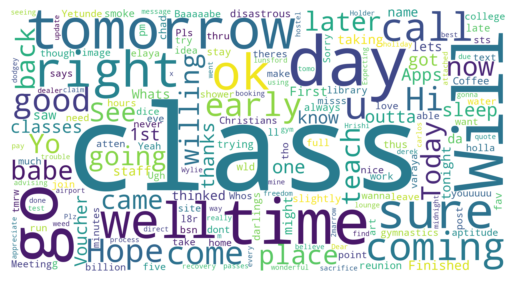

cluster size:  42
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham


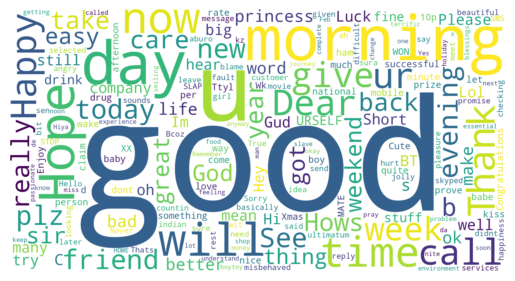

cluster size:  144
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham


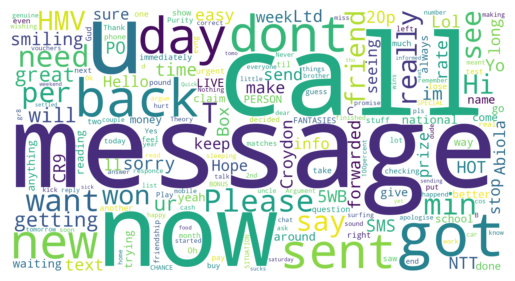

cluster size:  226
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham


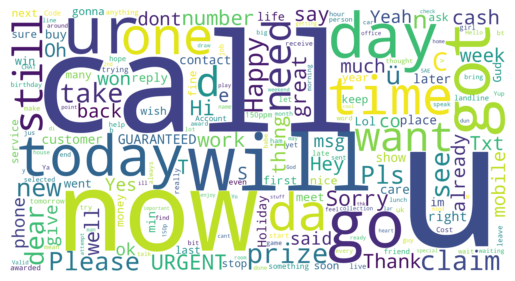

cluster size:  2630
-ham
-ham
-spam
-ham
-ham
-ham
-ham
-spam
-ham
-ham


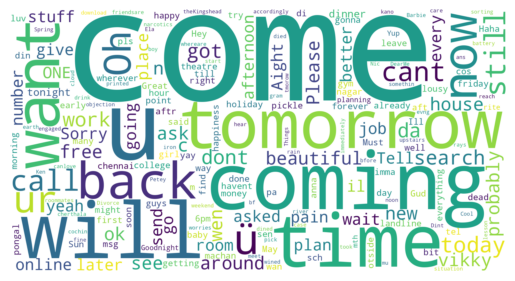

cluster size:  141
-ham
-spam
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham


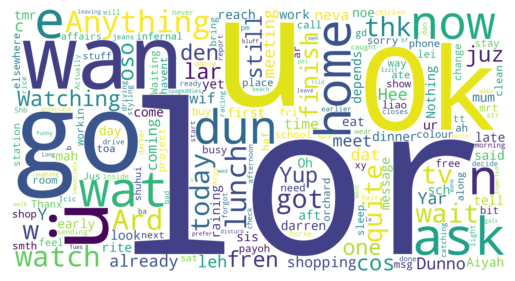

cluster size:  106
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham


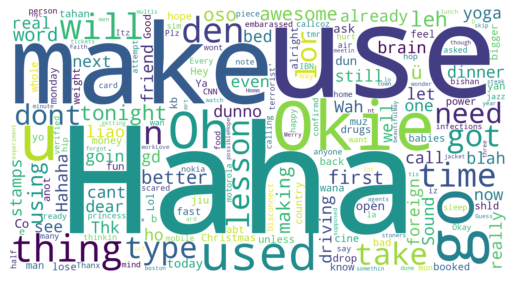

cluster size:  111
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham


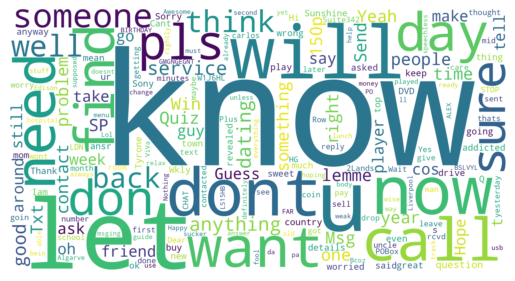

cluster size:  173
-ham
-ham
-ham
-ham
-ham
-spam
-ham
-ham
-ham
-ham


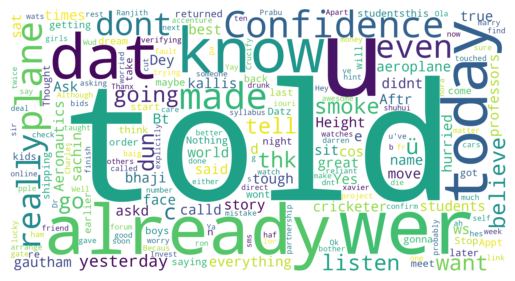

cluster size:  44
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham


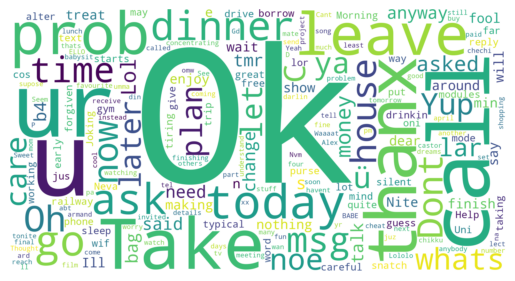

cluster size:  118
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham


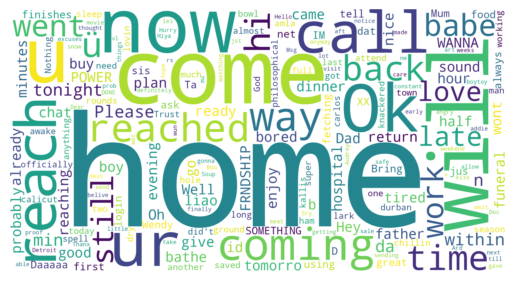

cluster size:  85
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham


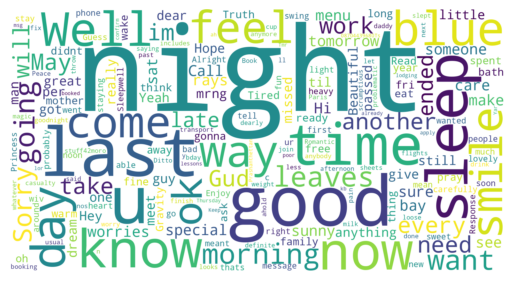

cluster size:  90
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham


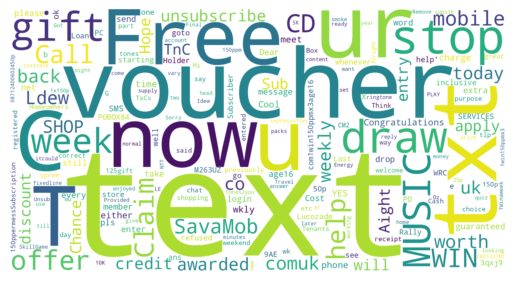

cluster size:  120
-ham
-ham
-spam
-spam
-ham
-ham
-spam
-ham
-ham
-ham


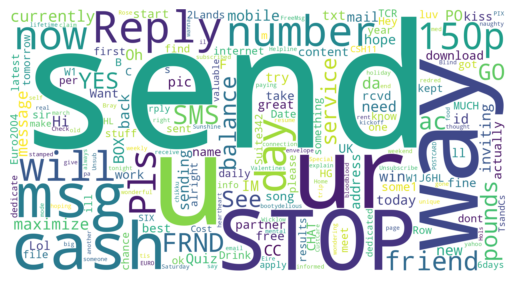

cluster size:  135
-spam
-ham
-ham
-ham
-ham
-spam
-spam
-ham
-ham
-spam


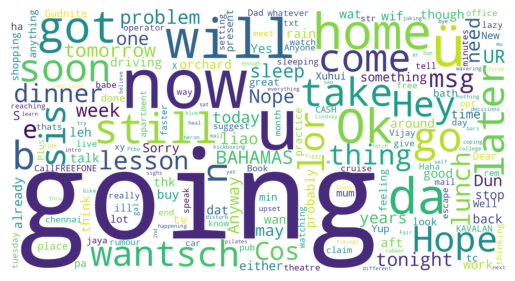

cluster size:  122
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham


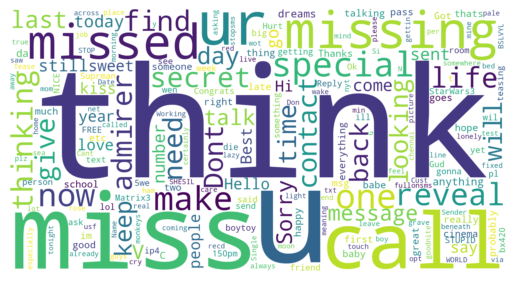

cluster size:  146
-ham
-ham
-spam
-ham
-ham
-ham
-spam
-ham
-ham
-ham


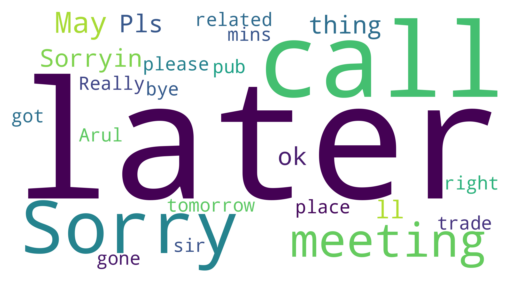

cluster size:  50
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham


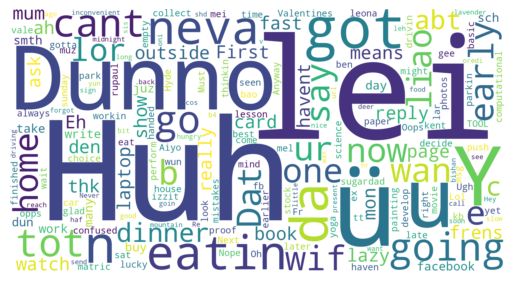

cluster size:  38
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham


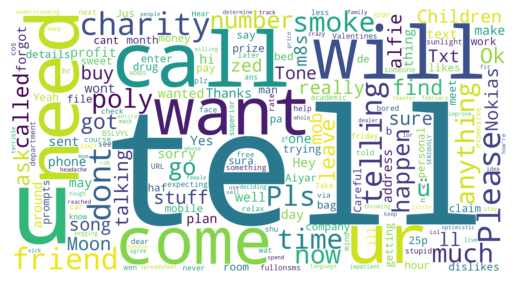

cluster size:  93
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham


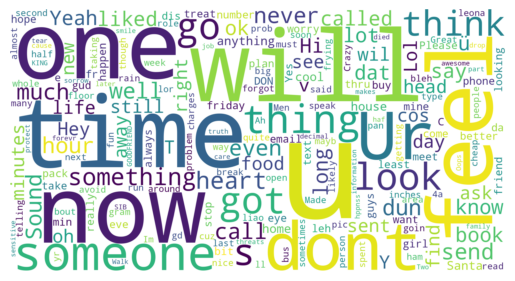

cluster size:  144
-spam
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham


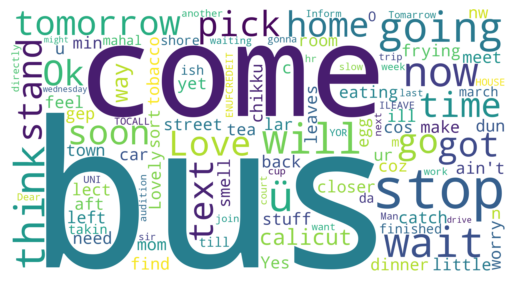

cluster size:  26
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham


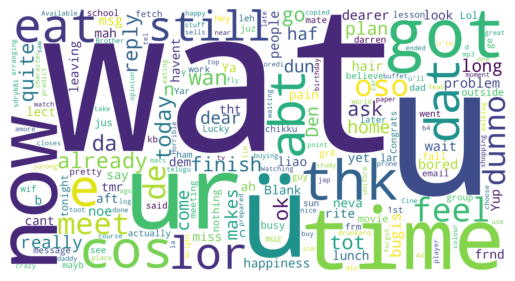

cluster size:  91
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham


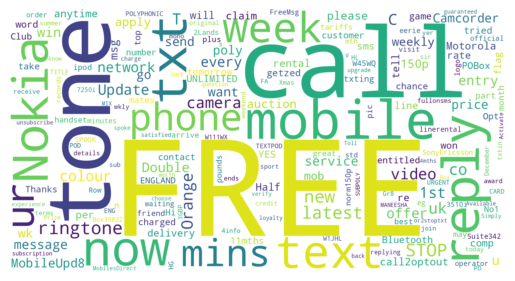

cluster size:  198
-spam
-spam
-spam
-spam
-spam
-ham
-spam
-spam
-ham
-ham


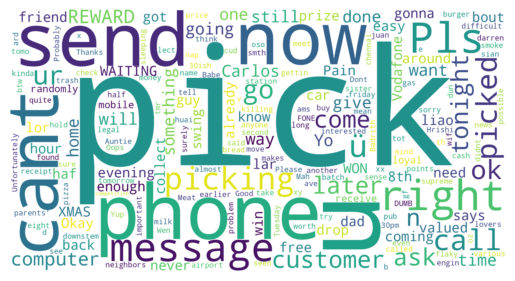

cluster size:  73
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham


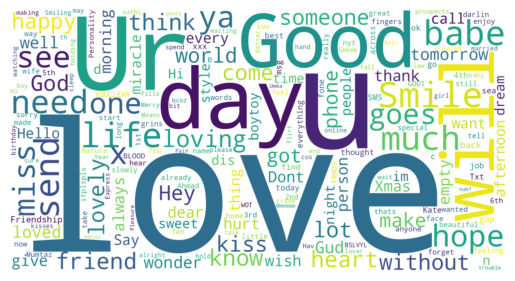

cluster size:  166
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham
-ham


In [ ]:
for cluster_id in range(0,num_clusters):
  matching_indices = (km.labels_== cluster_id)
  all_text = " ".join(txt for txt in category[matching_indices.nonzero()[0]])
  word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                          width = 2048, height = 1080).generate(all_text)
  plt.imshow(word_cloud1, interpolation='bilinear')
  plt.axis("off")
  plt.show()
  print("cluster size: ",category[matching_indices].size)
  print("-"+"\n-".join(txt for txt in labels[matching_indices][0:10]))

In [ ]:
# first new post
new_post = "Claim your prize now"
new_post_vec = vectorizer.transform([new_post])

In [ ]:
new_post_cluster = km.predict(new_post_vec)[0]
print(new_post_cluster)

3


In [ ]:
cluster_neighbor_indices = (km.labels_==new_post_cluster).nonzero()[0]
print(cluster_neighbor_indices[0:10]) #first 10 cluster indicies

[ 3  7  8 10 13 14 15 17 18 20]


In [ ]:
np.random.choice(labels[cluster_neighbor_indices],10)

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'spam'], dtype=object)

In [ ]:
cluster_neighbors = []
for i in cluster_neighbor_indices:
  dist = np.linalg.norm((new_post_vec.toarray() - csv_cat[i].toarray()))
  cluster_neighbors.append((dist, category[i], labels[i]))
cluster_neighbors = sorted(cluster_neighbors)
print(len(cluster_neighbors))

2630


In [ ]:
num_representative_messages = 5
representative_indices = np.random.choice(range(len(cluster_neighbors)), num_representative_messages)
for i in range(0, len(representative_indices)):
  print(cluster_neighbors[representative_indices[i]])

(1.414213562373095, 'Japanese Proverb: If one Can do it U too Can do it If none Can do itU must do it Indian version: If one Can do it LET HIM DO it.. If none Can do itLEAVE it!! And finally Kerala version: If one can do it Stop him doing it.. If none can do it Make a strike against it ...', 'ham')
(1.4142135623730951, 'PLEASSSSSSSEEEEEE TEL ME V AVENT DONE SPORTSx', 'ham')
(1.4142135623730951, 'Buy Space Invaders 4 a chance 2 win orig Arcade Game console. Press 0 for Games Arcade (std WAP charge) See o2.co.uk/games 4 Terms + settings. No purchase', 'spam')
(1.4142135623730951, 'Is there any training tomorrow?', 'ham')
(1.4142135623730951, 'Then why you came to hostel.', 'ham')


In [ ]:
scount = 0
hcount = 0
for dist, category, label in cluster_neighbors:
  if(label == 'spam'):
    scount += 1
  elif (label == 'ham'):
    hcount += 1
print(scount)
print(hcount)

310
2320


In [ ]:
s_per = scount / len(cluster_neighbors)
h_per = hcount / len(cluster_neighbors)

print(s_per, h_per)

0.11787072243346007 0.8821292775665399


In [ ]:
new_post_dist = cos_similarity(new_post_vec.toarray(), km.cluster_centers_[new_post_cluster])
new_post_dist

0.11400050077653566

In [ ]:
#second new post
new_post = "I think it will be fine"
new_post_vec = vectorizer.transform([new_post])

new_post_cluster = km.predict(new_post_vec)[0]
print("num cluster: ", new_post_cluster)

cluster_neighbor_indices = (km.labels_==new_post_cluster).nonzero()[0]
np.random.choice(labels[cluster_neighbor_indices],10)

labels = df['type']
labels = labels.to_numpy()
category = df['msg']
category = category.to_numpy()

cluster_neighbors = []
for i in cluster_neighbor_indices:
  dist = np.linalg.norm((new_post_vec.toarray() - csv_cat[i].toarray()))
  cluster_neighbors.append((dist, category[i], labels[i]))
cluster_neighbors = sorted(cluster_neighbors)
print("cluster size: " ,len(cluster_neighbors))

print("Representative messages: ")
num_representative_messages = 5
representative_indices = np.random.choice(range(len(cluster_neighbors)), num_representative_messages)
for i in range(0, len(representative_indices)):
  print(cluster_neighbors[representative_indices[i]])

scount = 0
hcount = 0
for dist, category, label in cluster_neighbors:
  if(label == 'spam'):
    scount += 1
  elif (label == 'ham'):
    hcount += 1
print("num spam: " ,scount)
print("num ham: " ,hcount)

s_per = scount / len(cluster_neighbors)
h_per = hcount / len(cluster_neighbors)

print(s_per, h_per)

new_post_dist = cos_similarity(new_post_vec.toarray(), km.cluster_centers_[new_post_cluster])
print("distance of new post to cluster center: " ,new_post_dist)

num cluster:  15
cluster size:  146
Representative messages: 
(1.2499422608306694, 'Yup... From what i remb... I think should be can book... ', 'ham')
(1.4142135623730951, "Honey boo I'm missing u.", 'ham')
(1.4142135623730951, "Single line with a big meaning::::: Miss anything 4 ur Best Life but don't miss ur best life for anything... Gud nyt...", 'ham')
(1.4142135623730951, 'Message:some text missing* Sender:Name Missing* *Number Missing *Sent:Date missing *Missing U a lot thats y everything is missing sent via fullonsms.com', 'ham')
(1.4142135623730951, 'Hurt me... Tease me... Make me cry... But in the end of my life when i die plz keep one rose on my grave and say STUPID I MISS U.. HAVE A NICE DAY BSLVYL', 'ham')
num spam:  16
num ham:  130
0.1095890410958904 0.8904109589041096
distance of new post to cluster center:  0.47101669280653324


In [ ]:
#third new post
new_post = "sorry ill talk to you later"
new_post_vec = vectorizer.transform([new_post])

new_post_cluster = km.predict(new_post_vec)[0]
print("num cluster: ", new_post_cluster)

cluster_neighbor_indices = (km.labels_==new_post_cluster).nonzero()[0]
np.random.choice(labels[cluster_neighbor_indices],10)

labels = df['type']
labels = labels.to_numpy()
category = df['msg']
category = category.to_numpy()

cluster_neighbors = []
for i in cluster_neighbor_indices:
  dist = np.linalg.norm((new_post_vec.toarray() - csv_cat[i].toarray()))
  cluster_neighbors.append((dist, category[i], labels[i]))
cluster_neighbors = sorted(cluster_neighbors)
print("cluster size: " ,len(cluster_neighbors))

print("Representative messages: ")
num_representative_messages = 5
representative_indices = np.random.choice(range(len(cluster_neighbors)), num_representative_messages)
for i in range(0, len(representative_indices)):
  print(cluster_neighbors[representative_indices[i]])

scount = 0
hcount = 0
for dist, category, label in cluster_neighbors:
  if(label == 'spam'):
    scount += 1
  elif (label == 'ham'):
    hcount += 1
print("num spam: " ,scount)
print("num ham: " ,hcount)

s_per = scount / len(cluster_neighbors)
h_per = hcount / len(cluster_neighbors)

print(s_per, h_per)

new_post_dist = cos_similarity(new_post_vec.toarray(), km.cluster_centers_[new_post_cluster])
print("distance of new post to cluster center: " ,new_post_dist)

num cluster:  16
cluster size:  50
Representative messages: 
(0.9555832143182666, "Sorry I'll call later", 'ham')
(0.9555832143182666, "Sorry I'll call later", 'ham')
(1.219252609514552, "Sorry i've not gone to that place. I.ll do so tomorrow. Really sorry.", 'ham')
(0.9555832143182666, "Sorry I'll call later", 'ham')
(1.1091703480250148, "Sorry I'll call you  later. I am in meeting sir.", 'ham')
num spam:  0
num ham:  50
0.0 1.0
distance of new post to cluster center:  0.5369156580575473


In [ ]:
#fourth new post
new_post = "Today shows you have won a prize!!"
new_post_vec = vectorizer.transform([new_post])

new_post_cluster = km.predict(new_post_vec)[0]
print("num cluster: ", new_post_cluster)

cluster_neighbor_indices = (km.labels_==new_post_cluster).nonzero()[0]
np.random.choice(labels[cluster_neighbor_indices],10)

labels = df['type']
labels = labels.to_numpy()
category = df['msg']
category = category.to_numpy()

cluster_neighbors = []
for i in cluster_neighbor_indices:
  dist = np.linalg.norm((new_post_vec.toarray() - csv_cat[i].toarray()))
  cluster_neighbors.append((dist, category[i], labels[i]))
cluster_neighbors = sorted(cluster_neighbors)
print("cluster size: " ,len(cluster_neighbors))

print("Representative messages: ")
num_representative_messages = 5
representative_indices = np.random.choice(range(len(cluster_neighbors)), num_representative_messages)
for i in range(0, len(representative_indices)):
  print(cluster_neighbors[representative_indices[i]])

scount = 0
hcount = 0
for dist, category, label in cluster_neighbors:
  if(label == 'spam'):
    scount += 1
  elif (label == 'ham'):
    hcount += 1
print("num spam: " ,scount)
print("num ham: " ,hcount)

s_per = scount / len(cluster_neighbors)
h_per = hcount / len(cluster_neighbors)

print(s_per, h_per)

new_post_dist = cos_similarity(new_post_vec.toarray(), km.cluster_centers_[new_post_cluster])
print("distance of new post to cluster center: " ,new_post_dist)

num cluster:  3
cluster size:  2630
Representative messages: 
(1.4142135623730951, 'Its a taxt massage....tie-pos argh ok! Lool!', 'ham')
(1.4142135623730951, "Sorry da thangam.it's my mistake.", 'ham')
(1.4142135623730951, 'aathi..where are you dear..', 'ham')
(1.4142135623730951, 'Ur TONEXS subscription has been renewed and you have been charged £4.50. You can choose 10 more polys this month. www.clubzed.co.uk *BILLING MSG*', 'spam')
(1.4142135623730951, "Oh yeah clearly it's my fault", 'ham')
num spam:  310
num ham:  2320
0.11787072243346007 0.8821292775665399
distance of new post to cluster center:  0.15217621198384457


In [ ]:
new_post = "Free nokia call to redeem"
new_post_vec = vectorizer.transform([new_post])

new_post_cluster = km.predict(new_post_vec)[0]
print("num cluster: ", new_post_cluster)

cluster_neighbor_indices = (km.labels_==new_post_cluster).nonzero()[0]
np.random.choice(labels[cluster_neighbor_indices],10)

labels = df['type']
labels = labels.to_numpy()
category = df['msg']
category = category.to_numpy()

cluster_neighbors = []
for i in cluster_neighbor_indices:
  dist = np.linalg.norm((new_post_vec.toarray() - csv_cat[i].toarray()))
  cluster_neighbors.append((dist, category[i], labels[i]))
cluster_neighbors = sorted(cluster_neighbors)
print("cluster size: " ,len(cluster_neighbors))

print("Representative messages: ")
num_representative_messages = 5
representative_indices = np.random.choice(range(len(cluster_neighbors)), num_representative_messages)
for i in range(0, len(representative_indices)):
  print(cluster_neighbors[representative_indices[i]])

scount = 0
hcount = 0
for dist, category, label in cluster_neighbors:
  if(label == 'spam'):
    scount += 1
  elif (label == 'ham'):
    hcount += 1
print("num spam: " ,scount)
print("num ham: " ,hcount)

s_per = scount / len(cluster_neighbors)
h_per = hcount / len(cluster_neighbors)

print(s_per, h_per)

new_post_dist = cos_similarity(new_post_vec.toarray(), km.cluster_centers_[new_post_cluster])
print("distance of new post to cluster center: " ,new_post_dist)

num cluster:  22
cluster size:  198
Representative messages: 
(1.3579977149299798, 'FREE RING TONE just text POLYS to 87131. Then every week get a new tone. 0870737910216yrs only £1.50/wk.', 'spam')
(1.2314837261783262, 'FREE for 1st week! No1 Nokia tone 4 ur mob every week just txt NOKIA to 8007 Get txting and tell ur mates www.getzed.co.uk POBox 36504 W45WQ norm150p/tone 16+', 'spam')
(1.2363707968459299, 'Do you want a New Nokia 3510i Colour Phone Delivered Tomorrow? With 200 FREE minutes to any mobile + 100 FREE text + FREE camcorder Reply or Call 8000930705 ham\t im .. On the snowboarding trip. I was wondering if your planning to get everyone together befor we go..a meet and greet kind of affair? Cheers ', 'spam')
(1.4142135623730951, 'You can stop further club tones by replying STOP MIX See my-tone.com/enjoy. html for terms. Club tones cost GBP4.50/week. MFL PO Box 1146 MK45 2WT (2/3)', 'spam')
(1.2939385653686575, 'Free Msg: get Gnarls Barkleys Crazy ringtone TOTALLY FREE just r

# Question 3

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=3)
pc = pca.fit_transform(csv_cat.toarray())

In [ ]:
labels = df['type']
labels = labels.to_numpy()
category = df['msg']
category = category.to_numpy()

In [ ]:
pc_df = pd.DataFrame(data = pc, columns = ['PC1', 'PC2', 'PC3'])
pc_df['Cluster'] = labels
pc_df['ID'] = category
pc_df

PC1       PC2       PC3 Cluster  \
0    -0.020151 -0.023403 -0.002956     ham   
1     0.265727 -0.015676 -0.031324     ham   
2    -0.029363 -0.021863 -0.051728    spam   
3    -0.010165 -0.016333 -0.009888     ham   
4    -0.030328 -0.023615 -0.024160     ham   
...        ...       ...       ...     ...   
5307 -0.036094 -0.020768 -0.071433    spam   
5308 -0.032138 -0.031616 -0.017979    spam   
5309 -0.008212 -0.023516  0.150611     ham   
5310 -0.016534 -0.015539 -0.015640     ham   
5311 -0.018537 -0.017170 -0.013930     ham   

                                                     ID  
0     Go until jurong point crazy.. Available only i...  
1                         Ok lar... Joking wif u oni...  
2     Free entry in 2 a wkly comp to win FA Cup fina...  
3     U dun say so early hor... U c already then say...  
4     Nah I don't think he goes to usf he lives arou...  
...                                                 ...  
5307  REMINDER FROM O2: To get 2.50 pounds free call...  
5308  This is the 2nd time we have tried 2 contact u...  
5309               Will ü b going to esplanade fr home?  
5310  Pity * was in mood for that. So...any other su...  
5311                         Rofl. Its true to its name  

[5312 rows x 5 columns]

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(pc_df, x="PC1", y="PC2", color = 'Cluster',hover_data=["ID"])
fig.show()

In [ ]:
pc_df = pd.DataFrame(data = pc, columns = ['PC1', 'PC2', 'PC3'])
pc_df['Cluster'] = labels
pc_df['ID'] = category
pc_df

fig = px.scatter_3d(pc_df, x="PC1", y="PC2", z="PC3", color = 'Cluster',hover_data=["ID"])
fig.show()

In [ ]:
print(pc_df)

           PC1       PC2       PC3 Cluster  \
0    -0.020151 -0.023403 -0.002956     ham   
1     0.265727 -0.015676 -0.031324     ham   
2    -0.029363 -0.021863 -0.051728    spam   
3    -0.010165 -0.016333 -0.009888     ham   
4    -0.030328 -0.023615 -0.024160     ham   
...        ...       ...       ...     ...   
5307 -0.036094 -0.020768 -0.071433    spam   
5308 -0.032138 -0.031616 -0.017979    spam   
5309 -0.008212 -0.023516  0.150611     ham   
5310 -0.016534 -0.015539 -0.015640     ham   
5311 -0.018537 -0.017170 -0.013930     ham   

                                                     ID  
0     Go until jurong point crazy.. Available only i...  
1                         Ok lar... Joking wif u oni...  
2     Free entry in 2 a wkly comp to win FA Cup fina...  
3     U dun say so early hor... U c already then say...  
4     Nah I don't think he goes to usf he lives arou...  
...                                                 ...  
5307  REMINDER FROM O2: To get 2.50 pound

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(csv_cat, labels, test_size=0.33)
pca = PCA(n_components=500)
X_train_pc = pca.fit_transform(X_train.toarray())
X_test_pc = pca.transform(X_test.toarray())
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

# Question 4

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
# low dimnesional classifier
%%time

X_train, X_test, y_train, y_test = train_test_split(csv_cat, labels, test_size=0.33)


n_components=15
pca = PCA(n_components=n_components)
X_train_pc = pca.fit_transform(X_train.toarray())
X_test_pc = pca.transform(X_test.toarray())
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
print("Variance explained by",n_components,"PCA components:", exp_var_cumul[-1])


pred = []
for test_feature in X_test_pc:
  dist = [np.linalg.norm((test_feature - train_feature)) for train_feature in X_train_pc]
  best_idx = np.argmin(dist)
  pred += [y_train[best_idx]]
accuracy = []

acc = (pred==y_test).sum()/y_test.size
accuracy += [acc]
f1 = f1_score(y_test, pred, pos_label = 'ham')
print("1-NN Classifier ("+str(n_components)+"PCs) -- Accuracy is:",acc)
print("F1 Score: ", f1)
print("")

NameError: ignored

In [ ]:
#full vectorized
%%time
X_train, X_test, y_train, y_test = train_test_split(csv_cat, labels, test_size=0.33)

X_train = X_train.toarray()
X_test = X_test.toarray()

pred = []
for test_feature in X_test:
  dist = [np.linalg.norm((test_feature - train_feature)) for train_feature in X_train]
  best_idx = np.argmin(dist)
  pred += [y_train[best_idx]]

acc = (pred==y_test).sum()/y_test.size
print("Classification accuracy is",acc,"\n")


f1 = f1_score(y_test, pred, pos_label = 'ham')
print("Full Vectorized 1-NN Classifier -- Accuracy is:", acc)
print("F1 Score: ", f1)

Classification accuracy is 0.9429549343981746 

Full Vectorized 1-NN Classifier -- Accuracy is: 0.9429549343981746
F1 Score:  0.9682136045772409
CPU times: user 48.3 s, sys: 128 ms, total: 48.4 s
Wall time: 51.9 s


# Question 5

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
%%time
X_train, X_test, y_train, y_test = train_test_split(csv_cat, labels, test_size=0.33)


n_components=15
pca = PCA(n_components=n_components)
X_train_pc = pca.fit_transform(X_train.toarray())
X_test_pc = pca.transform(X_test.toarray())
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
print("Variance explained by",n_components,"PCA components:", exp_var_cumul[-1])

n = 1
knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train_pc, y_train)

pred = knn.predict(X_test_pc)

acc = (pred==y_test).sum()/y_test.size
accuracy += [acc]
f1 = f1_score(y_test, pred, pos_label = 'ham')
print("kNN Classifier ("+str(n_components)+"PCs) -- Accuracy is:",acc)
print("F1 Score: ", f1)
print("")

Variance explained by 15 PCA components: 0.08148920728600562
kNN Classifier (15PCs) -- Accuracy is: 0.959498003422704
F1 Score:  0.976325441813938

CPU times: user 2.3 s, sys: 1.56 s, total: 3.86 s
Wall time: 2.1 s


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
tn,fp,fn,tp

(1464, 42, 29, 218)

In [ ]:
%%time
X_train, X_test, y_train, y_test = train_test_split(csv_cat, labels, test_size=0.33)

n = 1
knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

acc = (pred==y_test).sum()/y_test.size
accuracy += [acc]
f1 = f1_score(y_test, pred, pos_label = 'ham')
print("kNN Classifier ("+str(n_components)+"PCs) -- Accuracy is:",acc)
print("F1 Score: ", f1)
print("")

kNN Classifier (15PCs) -- Accuracy is: 0.930405019965773
F1 Score:  0.9612944162436549

CPU times: user 687 ms, sys: 4.17 ms, total: 692 ms
Wall time: 418 ms


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
tn,fp,fn,tp

(1515, 0, 122, 116)